# 貝葉斯分類器

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 讀取數據

In [2]:
train = pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
ans = pd.read_csv("gender_submission.csv")
ans

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 了解數據

In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S


In [8]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#### 數據集中年齡大Age概丟失了20%，但考慮到活下來的大多都是年輕人，所以可以嘗試去填滿這些缺失的年齡
#### 船艙Cabin的資訊有大概77%不見了，所以等毀應該會把這項去掉
#### 有兩筆從哪邊登船Embarked的資料不見了，但這不會是大問題

# 可視化數據

0.7420382165605095
0.18890814558058924


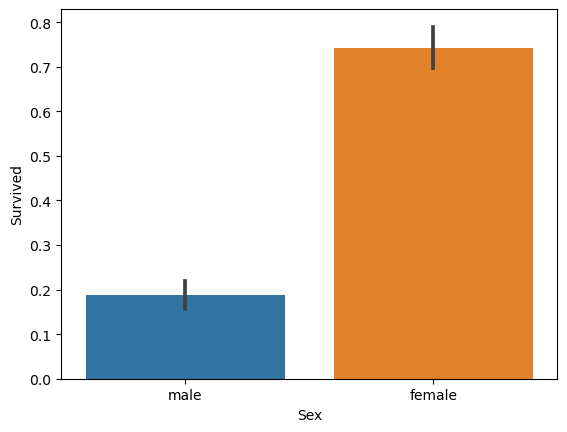

In [9]:
#觀察生存下來的性別
sns.barplot(x="Sex", y="Survived", data=train)
print(train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1])    #印出有幾%的女性活下來
print(train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1])    #印出有幾%的男性活下來

0.6296296296296297
0.47282608695652173
0.24236252545824846


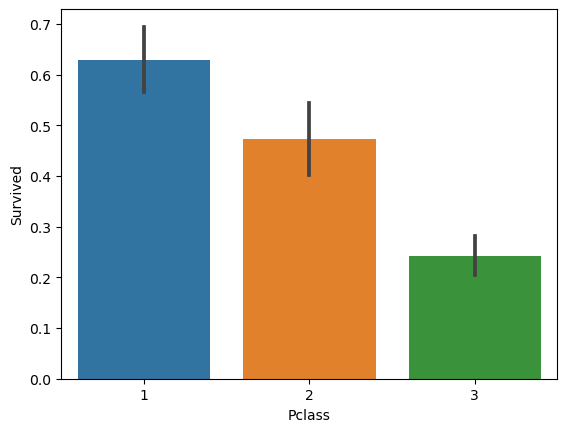

In [10]:
#觀察各個社經地位(1是最高，3是最低)的人存活下來的比例
sns.barplot(x="Pclass", y="Survived", data=train)

print(train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1])
print(train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1])
print(train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1])

0.4642857142857143

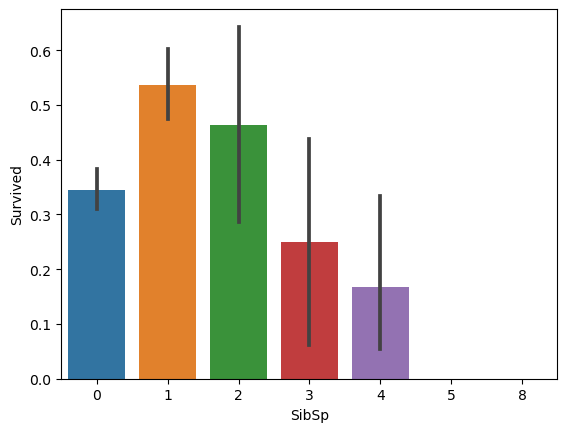

In [11]:
#觀察在不同的同遊人數下，存活率多少，獨自一人出遊的卻比攜伴(1,2) 人出遊的存活率要低
sns.barplot(x="SibSp", y="Survived", data=train)
train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]
train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]
train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]

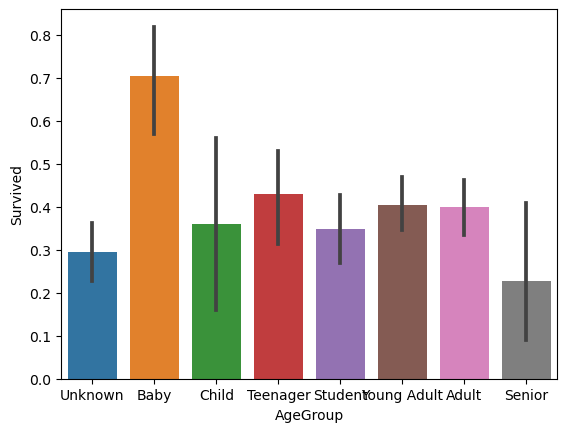

In [12]:
#把年齡分成未知(-1~0)、小寶寶(0~5)、小孩(5~12)、青年(12~18)、學生(18~24)、年輕成年人(24~35)、成年人(35~60)、老人(60~10000...)
#看這些年齡層的存活率
train["Age"] = train["Age"].fillna(-0.5)      #把沒有年齡資料的部分都寫為-0.5歲
test["Age"] = test["Age"].fillna(-0.5)      #把沒有年齡資料的部分都寫為-0.5歲

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)     #用pd.cut可以切分區間，bins的長度要比labels多1
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)     #用pd.cut可以切分區間，bins的長度要比labels多1

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

0.6666666666666666
0.29985443959243085


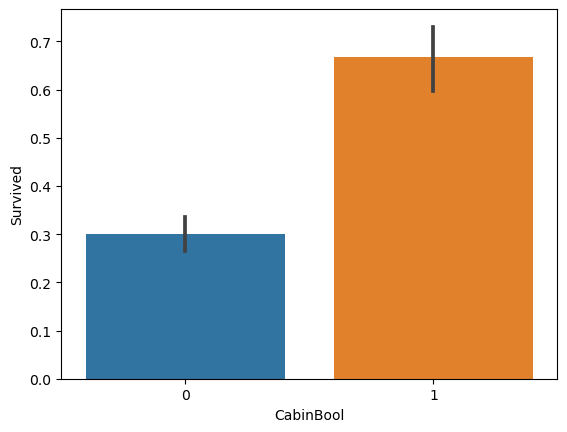

In [13]:
#看有艙位跟沒有艙位的旅客的存活率
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))     #把有艙位的人在'CabinBool'中標示成1
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))     #把有艙位的人在'CabinBool'中標示成1

print(train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1])
print(train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1])

sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

# 清理資料

In [14]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [15]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
CabinBool        0
dtype: int64


## 艙位Cabin有太多缺失值，所以丟掉

In [16]:
#艙位Cabin有太多缺失值，所以丟掉
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

## 票號Ticket也是沒有用的資訊，所以也丟掉

In [17]:
#票號Ticket也是沒有用的資訊，所以也丟掉
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

## Embarked有2個缺失值，我們就拿最大眾的來補

In [18]:
#Embarked(從哪裡登船)有2個缺失值，我們就拿最大眾的來補
print(train[train["Embarked"] == "S"].shape[0])
print(train[train["Embarked"] == "C"].shape[0])
print(train[train["Embarked"] == "Q"].shape[0])

train = train.fillna({"Embarked": "S"})     #S最多，所以就用S來補吧

644
168
77


## 補上年齡的缺失值
### 從名字中提取稱謂>稱謂太多種所以要簡化>把稱謂用數字編碼>找出編碼稱謂中最多的年齡層(眾數)>填入未知的AgeGroup>把AgeGroup編碼

### 從名字中提取稱謂

In [19]:
#剛剛暫時把年齡的缺失值用-5代替，現在要想辦法用名字預測年齡
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)     #從名字中提取" "跟"."之間的字串，因為稱謂通常夾在空格跟點之間
    print(dataset['Title'])     #印出所有人的稱謂

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object
0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


In [20]:
pd.crosstab(train['Title'], train['Sex'])     #把稱謂跟性別放在一起看

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

### 稱謂太多種所以要簡化

In [22]:
#把稱謂都改成Rare、Royal、Miss或者Mrs這四種
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    #把少數稱謂都用'Rare'代替
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')#把['Countess', 'Lady', 'Sir']都用'Royal'代替
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')#把['Mlle']都用'Miss'代替
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')#把['Ms']都用'Miss'代替
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')#把['Mmer']都用'Mrs'代替
    
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [23]:
#查看所有稱謂的存活人數跟機率
print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).sum())
print(train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master        23
1    Miss       130
2      Mr        81
3     Mrs       100
4    Rare         6
5   Royal         2
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000


### 把稱謂用數字編碼

In [24]:
#把稱謂數字化
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


### 找出編碼稱謂中最多的年齡層(眾數)

In [25]:
#找出該稱謂中AgeGroup最多的那個年齡層，用pd.mode()來找
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult     #找出Title=1的AgeGroup的眾數，應該會是Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student       #找出Title=2的AgeGroup的眾數，應該會是Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult          #找出Title=3的AgeGroup的眾數，應該會是Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby        #找出Title=4的AgeGroup的眾數，應該會是Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult        #找出Title=5的AgeGroup的眾數，應該會是Adult&Young Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult         #找出Title=6的AgeGroup的眾數，應該會是Adult
print(mr_age,'\n',miss_age,'\n',mrs_age,'\n',master_age,'\n',royal_age,'\n',rare_age,'\n')

0    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'] 
 0    Unknown
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'] 
 0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'] 
 0    Baby
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'] 
 0    Young Adult
1          Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'] 
 0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): ['Unknown' < 'Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' < 'Senior'] 

### 填入未知的AgeGroup

In [26]:
#Title=2的AgeGroup的眾數是Unknown，而Title=2是Miss，所以我們用Student代替
#Title=5的AgeGroup的眾數是Adult&Young Adult，就直接擇一，我們選用Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]


train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


### 把AgeGroup編碼

In [27]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5.0,0,1


In [28]:
#年齡現在用不到了，丟掉
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,0,1


## 名字也是沒有用的資訊，所以也丟掉 

In [29]:
#名字現在用不到了，丟掉
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,male,1,0,7.2500,S,4.0,0,1
1,2,1,1,female,1,0,71.2833,C,6.0,1,3
2,3,1,3,female,0,0,7.9250,S,5.0,0,2
3,4,1,1,female,1,0,53.1000,S,5.0,1,3
4,5,0,3,male,0,0,8.0500,S,5.0,0,1


## 把性別編碼

In [30]:
#把性別編碼，"male": 0, "female": 1
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


## 把從哪裡登船編碼

In [31]:
#把從哪裡登船編碼，"S": 1, "C": 2, "Q": 3
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


## 把船票價格編碼 (測試集有缺船票價格，要先補)

In [32]:
#先補測試集中缺少的船票價格，找出測試集中缺少傳票的那一項的艙等，併用其他同艙等的取平均當作他的票價
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x]    #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)

print(pd.isnull(test).sum())

PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
dtype: int64


In [33]:
#把票價前25%的標為4，把票價25%~50%的標為3，把票價50%~75%的標為2，把票價最後25%的標為1
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])   #用pd.qcut可以自動找出25% 50% 75%，並把相對應的數值標註labels
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])#用pd.qcut可以自動找出25% 50% 75%，並把相對應的數值標註labels

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,7.2500,1,4.0,0,1,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3,4
2,3,1,3,1,0,0,7.9250,1,5.0,0,2,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3,4
4,5,0,3,0,0,0,8.0500,1,5.0,0,1,2


In [34]:
#票價用不到了，丟掉
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [35]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


## 查看還有沒有缺失

In [36]:
#沒有缺失值了
print(pd.isnull(train).sum())
print(pd.isnull(test).sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
FareBand       0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
FareBand       0
dtype: int64


# 切分資料集

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

# 貝葉斯分類器Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

### 訓練分類器

In [40]:
#訓練分類器
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

GaussianNB()

In [41]:
gaussian.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [42]:
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [43]:
confusion_matrix(y_val,y_pred)

array([[90, 34],
       [ 8, 65]], dtype=int64)

In [44]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       124
           1       0.66      0.89      0.76        73

    accuracy                           0.79       197
   macro avg       0.79      0.81      0.78       197
weighted avg       0.82      0.79      0.79       197



### 測試分類器

In [45]:
x_test = test.drop(['PassengerId'], axis=1)
y_test_pred = gaussian.predict(x_test)

In [46]:
test_ans = ans.drop(['PassengerId'], axis=1)
acc_gaussian = round(accuracy_score(y_test_pred, test_ans) * 100, 2)
print(acc_gaussian)

84.69


In [47]:
confusion_matrix(y_test_pred, test_ans)

array([[208,   6],
       [ 58, 146]], dtype=int64)

In [48]:
print(classification_report(y_test_pred, test_ans))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       214
           1       0.96      0.72      0.82       204

    accuracy                           0.85       418
   macro avg       0.87      0.84      0.84       418
weighted avg       0.87      0.85      0.84       418



### 調整貝氏分類器的參數，用GridSearchCV找出最好的那組參數

In [49]:
param_grid = {
    'var_smoothing'  : [1e-15,1e-14,1e-13,1e-12,1e-11,2e-11,5e-11,1e-10,1e-9]    #調整所有特征的最大方差
}
n_folds = 5

In [50]:
gaussian = GaussianNB()
grid = GridSearchCV(gaussian, param_grid, cv = n_folds, n_jobs = -1,return_train_score=True)     #用GridSearchCV就可以自動調整參數，但適合小樣本
grid

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                                           2e-11, 5e-11, 1e-10, 1e-09]},
             return_train_score=True)

In [51]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11,
                                           2e-11, 5e-11, 1e-10, 1e-09]},
             return_train_score=True)

In [52]:
cv_result = pd.DataFrame(grid.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006782,0.001163,0.003590,4.887142e-04,0.0,{'var_smoothing': 1e-15},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
1,0.006183,0.000746,0.003590,7.982375e-04,0.0,{'var_smoothing': 1e-14},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
2,0.005387,0.001353,0.002991,5.917394e-07,0.0,{'var_smoothing': 1e-13},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
3,0.004788,0.000399,0.003191,3.995900e-04,0.0,{'var_smoothing': 1e-12},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
4,0.004588,0.000798,0.003591,7.979633e-04,0.0,{'var_smoothing': 1e-11},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
5,0.004587,0.000797,0.002993,7.599534e-07,0.0,{'var_smoothing': 2e-11},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
6,0.004189,0.000398,0.003391,4.872564e-04,0.0,{'var_smoothing': 5e-11},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
7,0.006383,0.001850,0.003192,3.996382e-04,0.0,{'var_smoothing': 1e-10},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081
8,0.005785,0.001935,0.002991,1.581490e-06,0.0,{'var_smoothing': 1e-09},0.748201,0.784173,0.784173,0.798561,...,0.791138,0.0298,1,0.807207,0.790991,0.798198,0.801802,0.77518,0.794676,0.011081


In [53]:
grid.best_score_    #最好參數下的分數

0.7911375247627983

In [54]:
best_grid = grid.best_estimator_
best_grid

GaussianNB(var_smoothing=1e-15)

In [55]:
best_grid.fit(x_train,y_train)

GaussianNB(var_smoothing=1e-15)

In [56]:
y_pred_bset = best_grid.predict(x_val)
acc_gaussian_bset = round(accuracy_score(y_pred_bset, y_val) * 100, 2)
print(acc_gaussian_bset)

78.68


In [57]:
confusion_matrix(y_val,y_pred_bset)

array([[90, 34],
       [ 8, 65]], dtype=int64)

In [59]:
print(classification_report(y_val,y_pred_bset))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       124
           1       0.66      0.89      0.76        73

    accuracy                           0.79       197
   macro avg       0.79      0.81      0.78       197
weighted avg       0.82      0.79      0.79       197

